# IPython: beyond plain Python

When executing code in IPython, all valid Python syntax works as-is, but IPython provides a number of features designed to make the interactive experience more fluid and efficient.

## First things first: running code, getting help

In the notebook, to run a cell of code, hit `Shift-Enter`. This executes the cell and puts the cursor in the next cell below, or makes a new one if you are at the end.  Alternately, you can use:
    
- `Alt-Enter` to force the creation of a new cell unconditionally (useful when inserting new content in the middle of an existing notebook).
- `Control-Enter` executes the cell and keeps the cursor in the same cell, useful for quick experimentation of snippets that you don't need to keep permanently.

In [1]:
print("Hi")

Hi


Getting help:

In [ ]:
?

Typing `object_name?` will print all sorts of details about any object, including docstrings, function definition lines (for call arguments) and constructor details for classes.

In [4]:
import collections
collections.namedtuple?

Signature:
collections.namedtuple(
    ['typename', 'field_names', '*', 'verbose=False', 'rename=False', 'module=None'],
)
Docstring:
Returns a new subclass of tuple with named fields.

>>> Point = namedtuple('Point', ['x', 'y'])
>>> Point.__doc__                   # docstring for the new class
'Point(x, y)'
>>> p = Point(11, y=22)             # instantiate with positional args or keywords
>>> p[0] + p[1]                     # indexable like a plain tuple
33
>>> x, y = p                        # unpack like a regular tuple
>>> x, y
(11, 22)
>>> p.x + p.y                       # fields also accessible by name
33
>>> d = p._asdict()                 # convert to a dictionary
>>> d['x']
11
>>> Point(**d)                      # convert from a dictionary
Point(x=11, y=22)
>>> p._replace(x=100)               # _replace() is like str.replace() but targets named fields
Point(x=100, y=22)
File:      /srv/conda/lib/python3.6/collections/__init__.py
Type:      function


In [5]:
collections.Counter??

Init signature: collections.Counter(*args, **kwds)
Source:        
class Counter(dict):
    '''Dict subclass for counting hashable items.  Sometimes called a bag
    or multiset.  Elements are stored as dictionary keys and their counts
    are stored as dictionary values.

    >>> c = Counter('abcdeabcdabcaba')  # count elements from a string

    >>> c.most_common(3)                # three most common elements
    [('a', 5), ('b', 4), ('c', 3)]
    >>> sorted(c)                       # list all unique elements
    ['a', 'b', 'c', 'd', 'e']
    >>> ''.join(sorted(c.elements()))   # list elements with repetitions
    'aaaaabbbbcccdde'
    >>> sum(c.values())                 # total of all counts
    15

    >>> c['a']                          # count of letter 'a'
    5
    >>> for elem in 'shazam':           # update counts from an iterable
    ...     c[elem] += 1                # by adding 1 to each element's count
    >>> c['a']                          # now there are seven 'a'
   

In [6]:
*int*?

FloatingPointError
int
print

An IPython quick reference card:

In [8]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

## Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [ ]:
collections.

## The interactive workflow: input, output, history

In [9]:
2+10

12

In [10]:
_+10

22

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [11]:
10+20;

In [12]:
_

22

The output is stored in `_N` and `Out[N]` variables:

In [15]:
_9== Out[9]

True

Previous inputs are available, too:

In [ ]:
In[11]

In [ ]:
_i

In [ ]:
%history -n 1-5

**Exercise**

Use `%history?` to have a look at `%history`'s magic documentation, and write the last 10 lines of history to a file named `log.py`.

## Accessing the underlying operating system

In [16]:
!pwd

/home/jovyan/intro-jupyter-git


In [17]:
files = !ls 
print("files this directory:")
print(files)

files this directory:
['01-Intro Jupyter Notebook.ipynb', '02-Beyond Plain Python.ipynb', '03-Git-Tutorial.ipynb', '04-Rich Output.ipynb', '05.00-widgets-introduction.ipynb', '05.01-widgets-overview.ipynb', '05.02-using-interact.ipynb', '05.03-widget_basics.ipynb', 'core.273', 'images', 'index.ipynb', 'jupyter-intro-lab.pdf', 'README.md', 'Rich Output Exercises - Custom Display Logic .ipynb']


In [18]:
!echo $files

[01-Intro Jupyter Notebook.ipynb, 02-Beyond Plain Python.ipynb, 03-Git-Tutorial.ipynb, 04-Rich Output.ipynb, 05.00-widgets-introduction.ipynb, 05.01-widgets-overview.ipynb, 05.02-using-interact.ipynb, 05.03-widget_basics.ipynb, core.273, images, index.ipynb, jupyter-intro-lab.pdf, README.md, Rich Output Exercises - Custom Display Logic .ipynb]


In [19]:
!echo {files[0].upper()}

01-INTRO JUPYTER NOTEBOOK.IPYNB


Note that all this is available even in multiline blocks:

In [20]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

00 - 01-Intro Jupyter Notebook
01 - 02-Beyond Plain Python
02 - 03-Git-Tutorial
03 - 04-Rich Output
04 - 05.00-widgets-introduction
05 - 05.01-widgets-overview
06 - 05.02-using-interact
07 - 05.03-widget_basics
--
--
10 - index
--
--
13 - Rich Output Exercises - Custom Display Logic 


## Beyond Python: magic functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [ ]:
%magic

Line vs cell magics:

In [ ]:
%timeit list(range(1000))

In [ ]:
%%timeit
list(range(10))
list(range(100))

Line magics can be used even inside code blocks:

In [ ]:
for i in range(1, 5):
    size = i*100
    print('size:', size, end=' ')
    %timeit list(range(size))

Magics can do anything they want with their input, so it doesn't have to be valid Python:

In [ ]:
%%bash
echo "My shell is:" $SHELL
echo "My disk usage is:"
df -h

Another interesting cell magic: create any file you want locally from the notebook:

In [ ]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

And more...

In [ ]:
!cat test.txt

Let's see what other magics are currently defined in the system:

In [ ]:
%lsmagic

In [ ]:
def to_optimize(N):
    total = [0,0]
    ta = 0
    tb = 0
    for i in range(N):
        for j in range(N):
            a = i**2
            b = j*2
            total[0] +=  a
            total[1] +=  b
    return total

In [ ]:
%timeit to_optimize(1_000)

In [ ]:
%prun to_optimize(1_000)

In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f to_optimize to_optimize(1_000)

## Running normal Python code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [ ]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

In [ ]:
In [1]: for i in range(10):
   ...:     print(i, end=' ')
   ...:     

And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [2]:
%%writefile mod.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Writing mod.py


Now let's call the function `g` with an argument that would produce an error:

In [3]:
import mod
mod.g(0)

ZeroDivisionError: float division by zero

In [4]:
%xmode plain
mod.g(0)

Exception reporting mode: Plain


ZeroDivisionError: float division by zero

In [5]:
%xmode verbose
mod.g(0)

Exception reporting mode: Verbose


ZeroDivisionError: float division by zero

The default `%xmode` is "context", which shows additional context but not all local variables.  Let's restore that one for the rest of our session.

In [6]:
%xmode context

Exception reporting mode: Context


## Basic debugging

When running code interactively, it can be tricky to figure out how to debug... 

In [7]:
mod.g(0)

ZeroDivisionError: float division by zero

In [8]:
%debug

> /home/jovyan/intro-jupyter-git/mod.py(3)f()
      1 
      2 def f(x):
----> 3     return 1.0/(x-1)
      4 
      5 def g(y):



ipdb>  !y+1


*** NameError: name 'y' is not defined


ipdb>  q


Don't foget to exit your debugging session. Raw input can of course be use to ask for user input:

In [9]:
enjoy = input('Are you enjoying this tutorial? ')
print('enjoy is:', enjoy)

Are you enjoying this tutorial?  yes


enjoy is: yes


## Running code in other languages with special `%%` magics

In [10]:
%%perl
@months = ("July", "August", "September");
print $months[0];

July

In [11]:
%%ruby
name = "world"
puts "Hello #{name.capitalize}!"

Couldn't find program: 'ruby'


## Plotting in the notebook

This magic configures matplotlib to render its figures inline:

In [12]:
%matplotlib inline

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A little chirp')

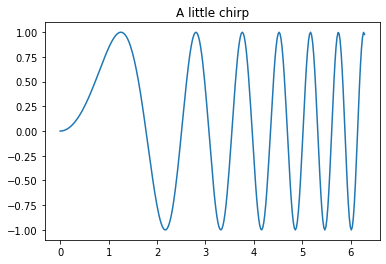

In [14]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")